In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

In [2]:
from scipy import stats

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

(0, 1)

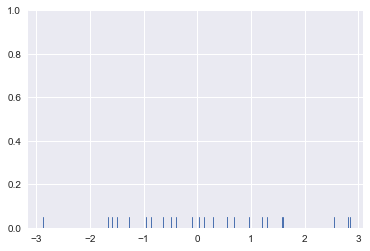

In [5]:
dataset= randn(25)
sns.rugplot(dataset)
plt.ylim(0, 1)

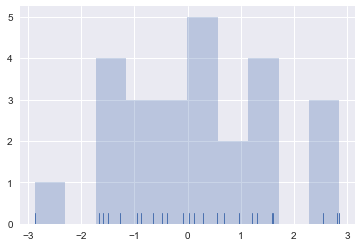

In [6]:
plt.hist(dataset, alpha= 0.3)
sns.rugplot(dataset)

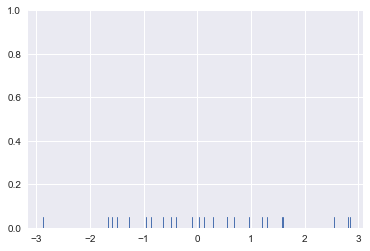

In [7]:
sns.rugplot(dataset)

x_min= dataset.min()-2
x_max= dataset.max()+2

x_axis= np.linspace(x_min, x_max, 100)

bandwidth= ((4*dataset.std()**5)/(3*len(dataset)))**.2

In [8]:
kernel_list= []

(0, 1)

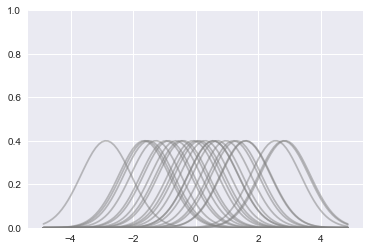

In [11]:
for data_point in dataset:
    kernel= stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel= kernel/ kernel.max()
    kernel= kernel*.4
    plt.plot(x_axis, kernel, color= 'grey', alpha= 0.5)

plt.ylim(0, 1)

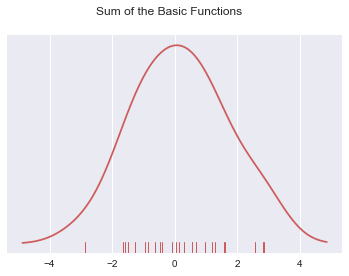

In [12]:
sum_of_kde= np.sum(kernel_list, axis= 0)

flg= plt.plot(x_axis, sum_of_kde, color= 'indianred')

sns.rugplot(dataset, c= 'indianred')
plt.yticks([])

plt.suptitle("Sum of the Basic Functions")

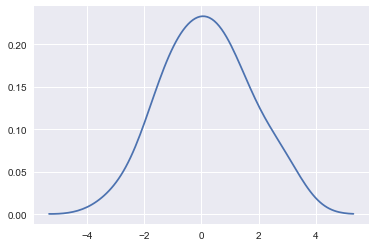

In [13]:
sns.kdeplot(dataset)

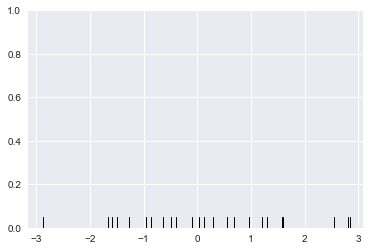

In [14]:
sns.rugplot(dataset, color = 'black')


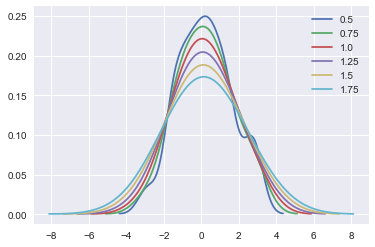

In [15]:
for bw in np.arange(0.5, 2.0, 0.25):
    sns.kdeplot(dataset, bw= bw, label= bw)

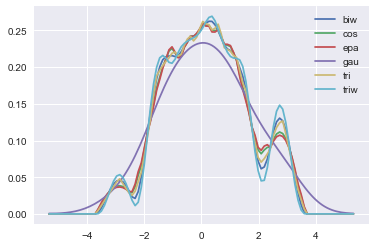

In [16]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset, kernel= kern, label= kern)

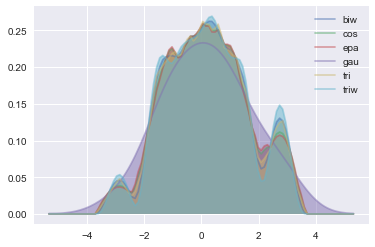

In [17]:
for kern in kernel_options:
    sns.kdeplot(dataset, kernel= kern, label= kern, shade= True, alpha= 0.5)

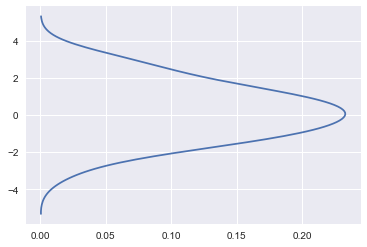

In [18]:
sns.kdeplot(dataset, vertical= True)

(array([  1.,   1.,   5.,   8.,  11.,  16.,  18.,  22.,  22.,  25.]),
 array([-2.86846171, -2.29617278, -1.72388384, -1.15159491, -0.57930598,
        -0.00701704,  0.56527189,  1.13756083,  1.70984976,  2.28213869,
         2.85442763]),
 <a list of 10 Patch objects>)

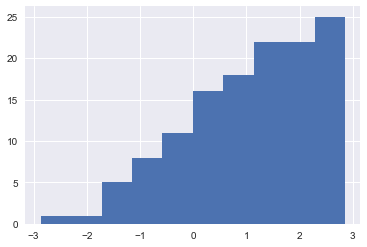

In [19]:
plt.hist(dataset, cumulative= True)

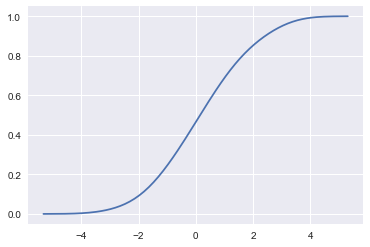

In [20]:
sns.kdeplot(dataset, cumulative= True)

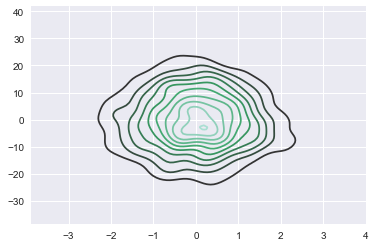

In [22]:
mean= [0, 0]
cov= [[1,0], [0, 100]]
dataset2= np.random.multivariate_normal(mean, cov, 1000)
dframe= pd.DataFrame(dataset2, columns= ['X', 'Y'])
sns.kdeplot(dframe)

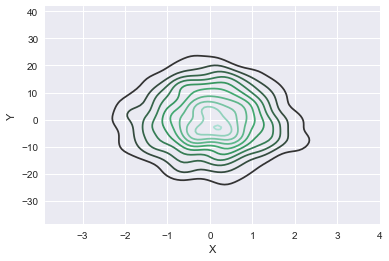

In [23]:
sns.kdeplot(dframe.X, dframe.Y)

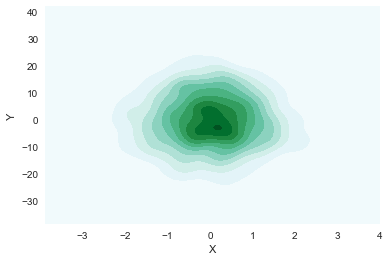

In [24]:
sns.kdeplot(dframe.X, dframe.Y, shade= True)

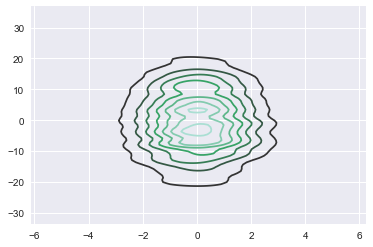

In [25]:
sns.kdeplot(dframe, bw= 1)

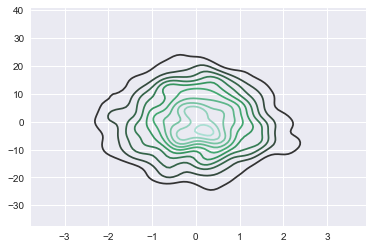

In [26]:
sns.kdeplot(dframe, bw= 'silverman')

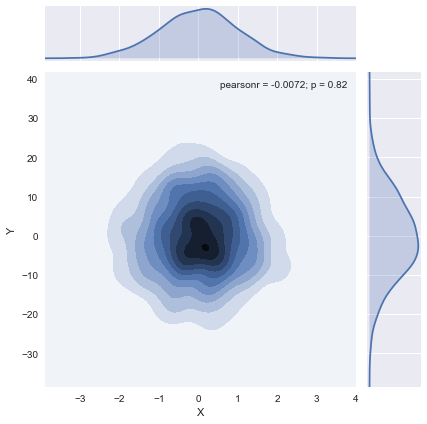

In [27]:
sns.jointplot('X', 'Y', dframe, kind= 'kde')